In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\moksh\\OneDrive\\Desktop\\Country-data.csv")




In [14]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


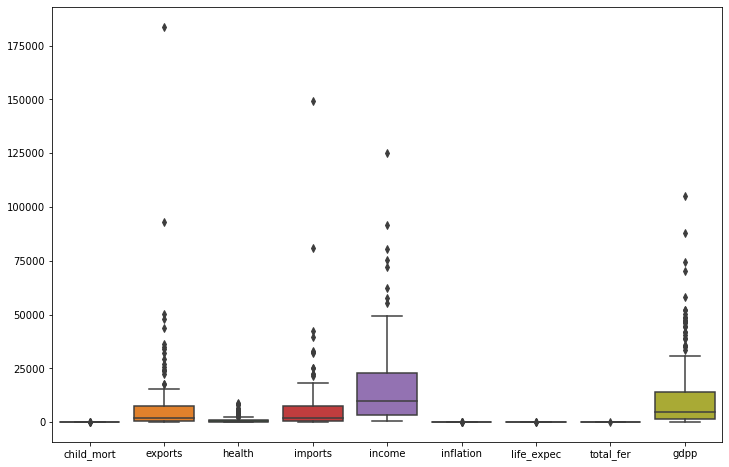

In [17]:

fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df)
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


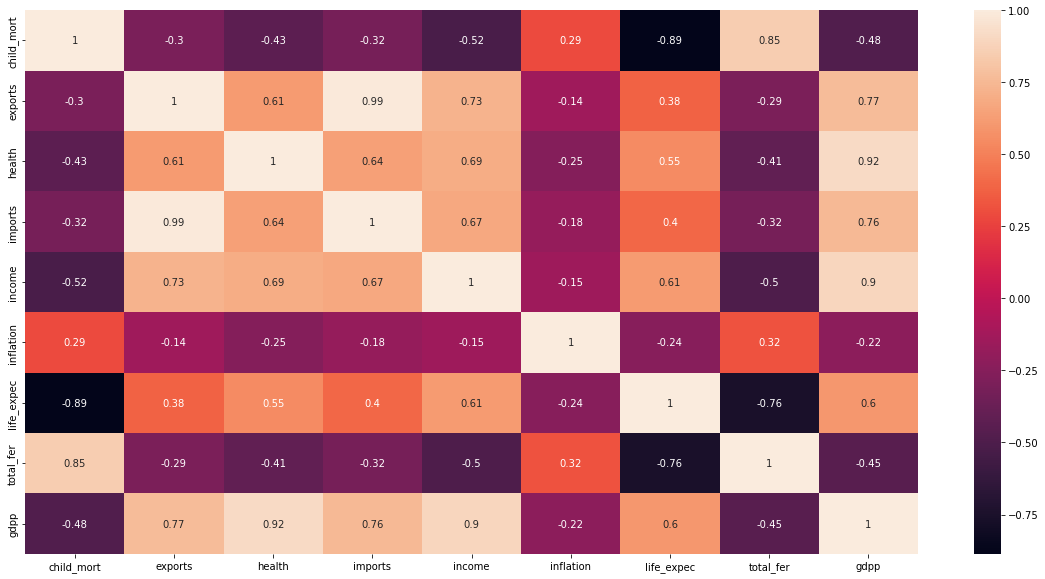

In [20]:

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [21]:
scaled_data = []

for i in range(len(df)):
    scaled_features = []
    for j in range(len(df.columns)-1):
        feature = df.iloc[i][j+1]
        feature_mean = np.mean(df.iloc[:, j+1])
        feature_std = np.std(df.iloc[:, j+1])
        scaled_feature = (feature - feature_mean) / (feature_std if feature_std != 0 else 1e-8)
        scaled_features.append(scaled_feature)
    scaled_data.append(scaled_features)

In [46]:
# Calculating covariance matrix
covariance_matrix = np.cov(scaled_data)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sorting eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print('eigen vectors \n %s'%eigenvectors)
print('eigen values \n%s' %eigenvalues)

# Calculating explained variance ratio
explained_variance_ratio = np.round(sorted_eigenvalues / np.sum(sorted_eigenvalues), 2)




eigen vectors 
 [[ 1.05166758e-01+0.j         -7.78092180e-02+0.j
   1.59982673e-02+0.j         ...  1.24588217e-02+0.j
  -6.03955090e-03-0.00408484j -6.03955090e-03+0.00408484j]
 [-2.14257053e-02+0.j          5.06376772e-02+0.j
   2.55254078e-03+0.j         ... -4.27708083e-03+0.j
   2.18732074e-03+0.00188842j  2.18732074e-03-0.00188842j]
 [ 1.18584699e-02+0.j          9.10732618e-02+0.j
  -2.33535032e-02+0.j         ...  9.88740939e-04+0.j
   3.38274534e-05-0.00038283j  3.38274534e-05+0.00038283j]
 ...
 [ 3.84384994e-03+0.j          6.83546475e-02+0.j
  -3.63863207e-02+0.j         ...  1.10397496e-01+0.j
  -1.57815966e-01-0.02626348j -1.57815966e-01+0.02626348j]
 [ 7.52981048e-02+0.j          6.14441023e-02+0.j
  -4.27080218e-02+0.j         ... -4.17233682e-04+0.j
   3.90815132e-04+0.00284273j  3.90815132e-04-0.00284273j]
 [ 1.04947044e-01+0.j         -6.95949648e-02+0.j
  -2.63090775e-02+0.j         ...  4.81749679e-03+0.j
  -3.29630002e-03-0.00721909j -3.29630002e-03+0.00721909j]]


C:\Users\moksh\anaconda3\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


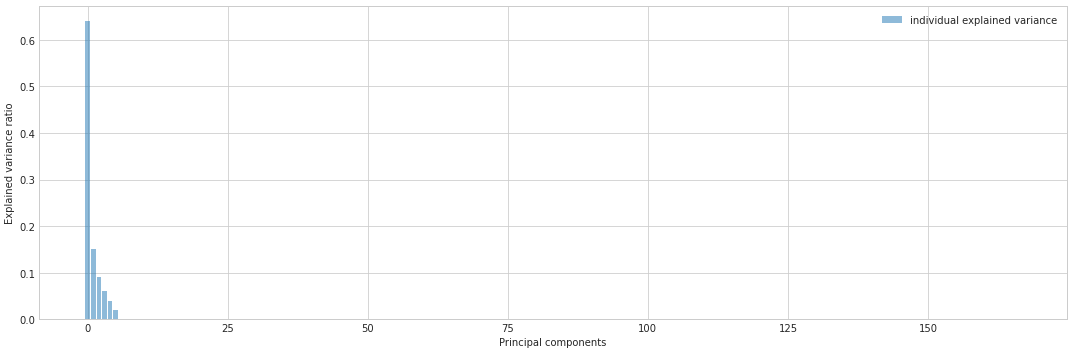

In [55]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 5))

    plt.bar(range(167),explained_variance_ratio, alpha=0.5, align='center',
            label='individual explained variance')

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


In [112]:
# Keeping the top 5 principal components
num_principal_components = 5
principal_components = sorted_eigenvectors[:, :num_principal_components]

# Transforming the scaled data into the principal components space
scaled_data_array = np.array(scaled_data)
pca_transformed_data = np.dot(scaled_data_array.T, principal_components)


In [ ]:
# Initializing K-Means clustering
num_clusters = 3
cluster_centroids = pca_transformed_data[:num_clusters]

# Reassigning cluster centroids
for _ in range(100):
    new_cluster_centroids = []
    cluster_assignments = []
    
    for i in range(len(pca_transformed_data)):
        distances = []
        for j in range(num_clusters):
            distance = np.linalg.norm(pca_transformed_data[i] - cluster_centroids[j])
            distances.append(distance)
        
        cluster_index = np.argmin(distances)
        cluster_assignments.append(cluster_index)
        
        new_cluster_centroid = np.mean(pca_transformed_data[np.where(np.array(cluster_assignments) == j)], axis=0)
        new_cluster_centroids.append(new_cluster_centroid)
    
    cluster_centroids = new_cluster_centroids

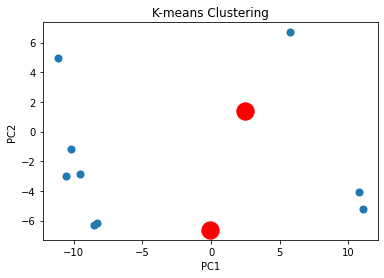

In [111]:
import matplotlib.pyplot as plt

# Extract PC1 and PC2 from the PCA-transformed data
pc1 = pca_transformed_data[:, 0]
pc2 = pca_transformed_data[:, 1]

# Create a scatter plot
plt.scatter(pc1, pc2,cmap='viridis',s=50)

# Plot the cluster centroids
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], s=300, c='red')

plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()